In [1]:
import numpy as np
import pandas as pd
from rulevetting.projects.tbi_pecarn.dataset import Dataset
from rulevetting.projects.tbi_pecarn.dataset import AgeSplit
from sklearn import metrics
pd.set_option("display.max_colwidth",1000)

/usr/local/lib/python3.9/site-packages/redis/connection.py:77: UserWarning: redis-py works best with hiredis. Please consider installing
  warnings.warn(msg)


# Read data

In [2]:
df_train_old, df_tune_old, df_test_old = Dataset().get_data(split_age=AgeSplit.OLD,load_csvs=False)
df_train_old = df_train_old.drop(columns=['AgeinYears','Race','Gender'])
df_tune_old = df_tune_old.drop(columns=['AgeinYears','Race','Gender'])
X_train_old = df_train_old.drop(columns="outcome")
y_train_old = df_train_old["outcome"].values
X_tune_old = df_tune_old.drop(columns="outcome")
y_tune_old = df_tune_old["outcome"].values

df_train_young, df_tune_young, df_test_young = Dataset().get_data(split_age=AgeSplit.YOUNG,load_csvs=False)
df_train_young = df_train_young.drop(columns=['AgeinYears','Race','Gender'])
df_tune_young = df_tune_young.drop(columns=['AgeinYears','Race','Gender'])
X_train_young = df_train_young.drop(columns="outcome")
y_train_young = df_train_young["outcome"].values
X_tune_young = df_tune_young.drop(columns="outcome")
y_tune_young = df_tune_young["outcome"].values

df_train_all, df_tune_all, df_test_all = Dataset().get_data(split_age=AgeSplit.AGEINVARIANT,load_csvs=False)
df_train_all = df_train_all.drop(columns=['AgeinYears','Race','Gender'])
df_tune_all = df_tune_all.drop(columns=['AgeinYears','Race','Gender'])
X_train_all = df_train_all.drop(columns="outcome")
y_train_all = df_train_all["outcome"].values
X_tune_all = df_tune_all.drop(columns="outcome")
y_tune_all = df_tune_all["outcome"].values

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step10_SFx': 2, 'step11_SFxBas': 3, 'step12_Clav': 3, 'step13_NeuroD': 3, 'step14_Vomit': 1, 'step15_HA': 2, 'step15_HAStart': False, 'step16_Seiz': 2, 'step16_SeizOccur': False, 'step17_LOC': 2, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': True, 'remove_constVal': True}}
kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 3, 'step8_OSI': 3, 'step9_HEMA': 3, 'step10_SFx': 2, 'step11_SFxBas': 3,

In [3]:
dset = Dataset()
# NOTE: This is just an example!
judg_calls = dset.get_judgement_calls_dictionary_default()
judg_calls["preprocess_data"]["step7_AMS"] = 1
judg_calls["preprocess_data"]["step8_OSI"] = 1
judg_calls["preprocess_data"]["step9_HEMA"] = 1
judg_calls["preprocess_data"]["step10_SFx"] = 1
judg_calls["preprocess_data"]["step11_SFxBas"] = 1
judg_calls["preprocess_data"]["step12_Clav"] = 1
judg_calls["preprocess_data"]["step13_NeuroD"] = 1
judg_calls["preprocess_data"]["step14_Vomit"] = 1
judg_calls["preprocess_data"]["step15_HA"] = 1
judg_calls["preprocess_data"]["step16_Seiz"] = 1
judg_calls["preprocess_data"]["step17_LOC"] = 1
judg_calls["extract_features"]["GCS"] = False

df_train_old_parent, df_tune_old_parent, df_test_old_parent = dset.get_data(split_age=AgeSplit.OLD,load_csvs=False, **judg_calls)
df_train_old_parent = df_train_old_parent.drop(columns=['AgeinYears','Race','Gender'])
df_tune_old_parent = df_tune_old_parent.drop(columns=['AgeinYears','Race','Gender'])
X_train_old_parent = df_train_old_parent.drop(columns="outcome")
y_train_old_parent = df_train_old_parent["outcome"].values
X_tune_old_parent = df_tune_old_parent.drop(columns="outcome")
y_tune_old_parent = df_tune_old_parent["outcome"].values

df_train_young_parent, df_tune_young_parent, df_test_young_parent = Dataset().get_data(split_age=AgeSplit.YOUNG,load_csvs=False, **judg_calls)
df_train_young_parent = df_train_young_parent.drop(columns=['AgeinYears','Race','Gender'])
df_tune_young_parent = df_tune_young_parent.drop(columns=['AgeinYears','Race','Gender'])
X_train_young_parent = df_train_young_parent.drop(columns="outcome")
y_train_young_parent = df_train_young_parent["outcome"].values
X_tune_young_parent = df_tune_young_parent.drop(columns="outcome")
y_tune_young_parent = df_tune_young_parent["outcome"].values

df_train_all_parent, df_tune_all_parent, df_test_all_parent = Dataset().get_data(split_age=AgeSplit.AGEINVARIANT,load_csvs=False, **judg_calls)
df_train_all_parent = df_train_all_parent.drop(columns=['AgeinYears','Race','Gender'])
df_tune_all_parent = df_tune_all_parent.drop(columns=['AgeinYears','Race','Gender'])
X_train_all_parent = df_train_all_parent.drop(columns="outcome")
y_train_all_parent = df_train_all_parent["outcome"].values
X_tune_all_parent = df_tune_all_parent.drop(columns="outcome")
y_tune_all_parent = df_tune_all_parent["outcome"].values

kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 1, 'step8_OSI': 1, 'step9_HEMA': 1, 'step10_SFx': 1, 'step11_SFxBas': 1, 'step12_Clav': 1, 'step13_NeuroD': 1, 'step14_Vomit': 1, 'step15_HA': 1, 'step15_HAStart': False, 'step16_Seiz': 1, 'step16_SeizOccur': False, 'step17_LOC': 1, 'step19_Drugs': False, 'step20_ActNormal': True}, 'extract_features': {'HEMA_umbrella': False, 'SFxPalp_umbrella': False, 'SFxBas_umbrella': False, 'AMS_umbrella': False, 'OSI_umbrella': False, 'Clav_umbrella': False, 'NeuroD_umbrella': False, 'Vomit_umbrella': False, 'HA_umbrella': False, 'Seiz_umbrella': False, 'LOC_umbrella': False, 'GCS': False, 'remove_constVal': True}}
kwargs {'clean_data': {}, 'preprocess_data': {'step1_injMech': False, 'step5_missSubGCS': True, 'step5_fake15GCS': True, 'step5_fake14GCS': True, 'step7_AMS': 1, 'step8_OSI': 1, 'step9_HEMA': 1, 'step10_SFx': 1, 'step11_SFxBas': 1

# Fit models

In [4]:
import os
import pickle as pkl
from os.path import join as oj

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree

import numpy as np
import pandas as pd

import imodels
from rulevetting.api import validation


MODELS_DIR = './models'
os.makedirs(MODELS_DIR, exist_ok=True)

outcome_def = 'outcome'  # output

In [5]:
def predict_and_save(model, model_name, X_train, X_tune, y_train, y_tune, MODELS_DIR = './models'):
    '''Plots cv and returns cv, saves all stats
    '''
    os.makedirs(MODELS_DIR, exist_ok=True)
    results = {'model': model}
    for x, y, suffix in zip([X_train, X_tune],
                            [y_train, y_tune],
                            ['_train', '_tune']):
        stats, threshes = validation.all_stats_curve(y, model.predict_proba(x)[:, 1],
                                                     plot=suffix == '_tune')
        for stat in stats.keys():
            results[stat + suffix] = stats[stat]
        results['threshes' + suffix] = threshes
    pkl.dump(results, open(oj(MODELS_DIR, model_name + '.pkl'), 'wb'))
    return stats, threshes

In [6]:
feature_names=list(X_train_old).copy()
feature_names_ageinvariant=list(X_train_all).copy()
feature_names_parent=list(X_train_old_parent).copy()
feature_names_ageinvariant_parent=list(X_train_all_parent).copy()


In [7]:
def print_metrics(suffix, X_train, X_tune, y_train, y_tune, MODELS_DIR = './models'):
    os.makedirs(MODELS_DIR, exist_ok=True)
    vals = {s: [] for s in ['sens', 'spec', 'ppv', 'npv', 'lr+', 'lr-', 'brier_score', 'f1']}
    fnames = []
    for fname in sorted(os.listdir(MODELS_DIR)):
        if 'pkl' in fname:
            if not fname[:-4] == 'rf':
                r = pkl.load(open(oj(MODELS_DIR, fname), 'rb'))
                threshes = np.array(r['threshes' + suffix])
                m = r['model']

                # add more stats
                for x, y, suff in zip([X_train, X_tune],
                                      [y_train, y_tune],
                                      ['_train', '_tune']):
                    if suff == suffix:
                        stats, threshes = validation.all_stats_curve(y, m.predict_proba(x)[:, 1],
                                                                     plot=suffix == '_tune')
                        preds_proba = m.predict_proba(x)[:, 1]
                        brier_score = metrics.brier_score_loss(y, preds_proba)

                # pick best vals
                sens = np.array(r['sens' + suffix])
                spec = np.array(r['spec' + suffix])
                best_idx = np.argmax(5 * sens + spec)
                for k in vals.keys():
                    if not k == 'brier_score':
                        #                         print('k', k)
                        vals[k].append(stats[k][best_idx])
                vals['brier_score'].append(brier_score)
                fnames.append(fname[:-4])
    stats = pd.DataFrame.from_dict(vals)
    stats.index = fnames
    return (stats).round(2).transpose()



# greedy (CART) rule list

In [11]:
#rulefit = imodels.RuleFitClassifier(max_rules=10, random_state=1)
#rulefit.fit(X_train_old, y_train_old, feature_names=feature_names)

#rules = rulefit.get_rules()
#rules = rules[rules.coef != 0].sort_values("support", ascending=False)

#rules[['rule', 'coef', 'support']].style.background_gradient(cmap='viridis')

In [73]:
weights_list = np.concatenate((np.array([10,50,100,150,200]),
                               np.arange(300,1100,100)),axis=None)
weights_list

array([  10,   50,  100,  150,  200,  300,  400,  500,  600,  700,  800,
        900, 1000])

## Children old

/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|█████████████████████████████████████████| 12/12 [00:00<00:00, 1237.38it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|█████████████████████████████████████████| 12/12 [00:00<00:00, 1209.69it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: Runtim

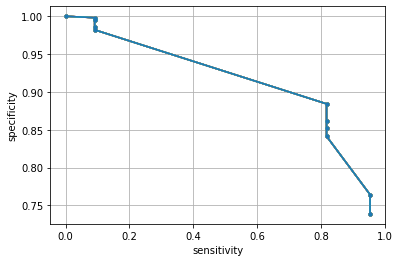

In [60]:
for i in weights_list:
    class_weight = {0: 1, 1: i}
    grl = imodels.GreedyRuleListClassifier(max_depth=12, class_weight=class_weight, criterion='neg_corr')
    grl.fit(X_train_old, y_train_old, feature_names=feature_names, verbose=False)
    stats, threshes = predict_and_save(grl,'grl_children_old_' + str(i), X_train_old, X_tune_old, y_train_old, y_tune_old,
                                      MODELS_DIR = './models/grl_children_old/')


100%|█████████████████████████████████████████| 12/12 [00:00<00:00, 1258.79it/s]


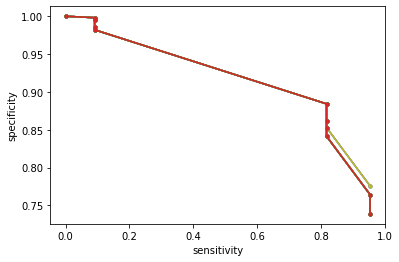

In [61]:
suffixes = ['_train', '_tune']  # _train, _test1, _test2
stats_list = {}
for i, suffix in enumerate(suffixes):
    stats_list[suffix] = print_metrics(suffix, X_train_old, X_tune_old, y_train_old, y_tune_old, MODELS_DIR = './models/grl_children_old/')

In [62]:
stats_list['_train']

,grl_children_old_10,grl_children_old_100,grl_children_old_1000,grl_children_old_150,grl_children_old_20,grl_children_old_200,grl_children_old_300,grl_children_old_400,grl_children_old_50,grl_children_old_500,grl_children_old_600,grl_children_old_700,grl_children_old_800,grl_children_old_900
sens,0.89,0.94,0.94,0.94,0.89,0.94,0.94,0.94,0.89,0.94,0.94,0.94,0.94,0.94
spec,0.78,0.74,0.74,0.74,0.78,0.74,0.74,0.74,0.78,0.74,0.74,0.74,0.74,0.74
ppv,0.03,0.02,0.02,0.02,0.03,0.02,0.02,0.02,0.03,0.02,0.02,0.02,0.02,0.02
npv,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
lr+,4.00,3.61,3.61,3.61,4.00,3.61,3.61,3.61,4.00,3.61,3.61,3.61,3.61,3.61
lr-,0.14,0.08,0.08,0.08,0.14,0.08,0.08,0.08,0.14,0.08,0.08,0.08,0.08,0.08
brier_score,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
f1,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05


In [63]:
stats_list['_tune']

,grl_children_old_10,grl_children_old_100,grl_children_old_1000,grl_children_old_150,grl_children_old_20,grl_children_old_200,grl_children_old_300,grl_children_old_400,grl_children_old_50,grl_children_old_500,grl_children_old_600,grl_children_old_700,grl_children_old_800,grl_children_old_900
sens,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95
spec,0.78,0.76,0.76,0.76,0.78,0.76,0.76,0.76,0.78,0.76,0.76,0.76,0.76,0.76
ppv,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
npv,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
lr+,4.26,4.05,4.05,4.05,4.26,4.05,4.05,4.05,4.26,4.05,4.05,4.05,4.05,4.05
lr-,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06
brier_score,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
f1,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04


In [64]:
stats_list['_tune'].iloc[:,(-np.array(stats_list['_tune'][0:1])).argsort().squeeze()[:10]]

,grl_children_old_10,grl_children_old_100,grl_children_old_1000,grl_children_old_150,grl_children_old_20,grl_children_old_200,grl_children_old_300,grl_children_old_400,grl_children_old_50,grl_children_old_500
sens,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95
spec,0.78,0.76,0.76,0.76,0.78,0.76,0.76,0.76,0.78,0.76
ppv,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
npv,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
lr+,4.26,4.05,4.05,4.05,4.26,4.05,4.05,4.05,4.26,4.05
lr-,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06
brier_score,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
f1,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04


In [66]:
class_weight = {0: 1, 1: 100}
grl = imodels.GreedyRuleListClassifier(max_depth=12, class_weight=class_weight, criterion='neg_corr')
grl.fit(X_train_old, y_train_old, feature_names=feature_names, verbose=False)
print(grl)

/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


mean 0.007 (12732 pts)
if SFxBasHem_1 >= 1.0 then 0.275 (40 pts)
mean 0.006 (12692 pts)
if feat 7 >= 1.0 then 0.029 (1262 pts)
mean 0.003 (11430 pts)
if feat 53 >= 1.0 then 0.25 (8 pts)
mean 0.003 (11422 pts)
if feat 99 >= 1.0 then 0.051 (118 pts)
mean 0.002 (11304 pts)
if feat 22 >= 1.0 then 0.021 (340 pts)
mean 0.002 (10964 pts)
if feat 115 >= 1.0 then 0.091 (11 pts)
mean 0.002 (10953 pts)
if feat 3 >= 1.0 then 0.008 (992 pts)
mean 0.001 (9961 pts)
if feat 124 >= 1.0 then 0.02 (100 pts)
mean 0.001 (9861 pts)
if feat 23 >= 1.0 then 0.033 (30 pts)
mean 0.001 (9831 pts)
if feat 35 >= 1.0 then 0.013 (157 pts)
mean 0.001 (9674 pts)
if feat 94 >= 1.0 then 0.006 (313 pts)
mean 0.001 (9361 pts)
if feat 18 >= 1.0 then 0.003 (656 pts)



In [67]:
lst = [feature_names[i] for i in [7,53,99,22,115,3,124,23,35,94,18]]
lst.insert(0, 'SFxBasHem_1')
lst

['SFxBasHem_1',
 'AMS',
 'SFxPalpDepress_1',
 'NeuroDSensory_0',
 'LocLen_3',
 'OSICut_1',
 'Vomit',
 'OSIAbdomen_1',
 'LocLen_4',
 'HASeverity_3',
 'ClavTem_1',
 'Amnesia_verb_1']

## Children young

/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|█████████████████████████████████████████| 13/13 [00:00<00:00, 1583.03it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|█████████████████████████████████████████| 13/13 [00:00<00:00, 1582.11it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: Runtim

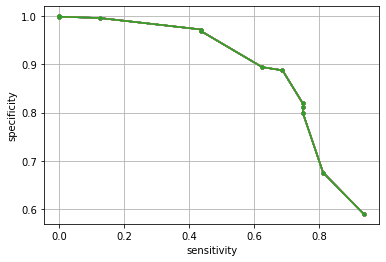

In [74]:
for i in weights_list:
    class_weight = {0: 1, 1: i}
    grl = imodels.GreedyRuleListClassifier(max_depth=12, class_weight=class_weight, criterion='neg_corr')
    grl.fit(X_train_young, y_train_young, feature_names=feature_names, verbose=False)
    stats, threshes = predict_and_save(grl,'grl_children_young_' + str(i), X_train_young, X_tune_young, y_train_young, y_tune_young,
                                      MODELS_DIR = './models/grl_children_young/')

100%|█████████████████████████████████████████| 13/13 [00:00<00:00, 1329.80it/s]


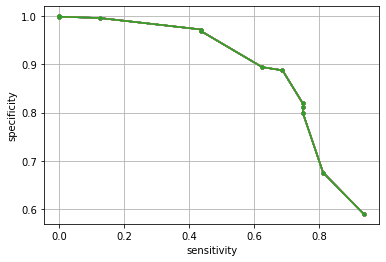

In [75]:
suffixes = ['_train', '_tune']  # _train, _test1, _test2
stats_list = {}
for i, suffix in enumerate(suffixes):
    stats_list[suffix] = print_metrics(suffix, X_train_young, X_tune_young, y_train_young, y_tune_young, MODELS_DIR = './models/grl_children_young/')

In [76]:
stats_list['_train']

,grl_children_young_10,grl_children_young_100,grl_children_young_1000,grl_children_young_150,grl_children_young_200,grl_children_young_300,grl_children_young_400,grl_children_young_50,grl_children_young_500,grl_children_young_600,grl_children_young_700,grl_children_young_800,grl_children_young_900
sens,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
spec,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58,0.58
ppv,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
npv,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
lr+,2.39,2.39,2.39,2.39,2.39,2.39,2.39,2.39,2.39,2.39,2.39,2.39,2.39
lr-,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
brier_score,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
f1,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03


In [77]:
stats_list['_tune']

,grl_children_young_10,grl_children_young_100,grl_children_young_1000,grl_children_young_150,grl_children_young_200,grl_children_young_300,grl_children_young_400,grl_children_young_50,grl_children_young_500,grl_children_young_600,grl_children_young_700,grl_children_young_800,grl_children_young_900
sens,0.94,0.94,0.94,0.94,0.94,0.94,0.94,0.94,0.94,0.94,0.94,0.94,0.94
spec,0.59,0.59,0.59,0.59,0.59,0.59,0.59,0.59,0.59,0.59,0.59,0.59,0.59
ppv,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
npv,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
lr+,2.28,2.28,2.28,2.28,2.28,2.28,2.28,2.28,2.28,2.28,2.28,2.28,2.28
lr-,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11
brier_score,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
f1,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03


In [78]:
stats_list['_tune'].iloc[:,(-np.array(stats_list['_tune'][0:1])).argsort().squeeze()[:10]]

,grl_children_young_10,grl_children_young_100,grl_children_young_1000,grl_children_young_150,grl_children_young_200,grl_children_young_300,grl_children_young_400,grl_children_young_50,grl_children_young_500,grl_children_young_600
sens,0.94,0.94,0.94,0.94,0.94,0.94,0.94,0.94,0.94,0.94
spec,0.59,0.59,0.59,0.59,0.59,0.59,0.59,0.59,0.59,0.59
ppv,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
npv,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
lr+,2.28,2.28,2.28,2.28,2.28,2.28,2.28,2.28,2.28,2.28
lr-,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11
brier_score,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
f1,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03


In [79]:
class_weight = {0: 1, 1: i}
grl = imodels.GreedyRuleListClassifier(max_depth=12, class_weight=class_weight, criterion='neg_corr')
grl.fit(X_train_young, y_train_young, feature_names=feature_names, verbose=False)
print(grl)

/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


mean 0.007 (7215 pts)
if SFxPalp >= 1.0 then 0.077 (208 pts)
mean 0.005 (7007 pts)
if feat 26 >= 1.0 then 1.0 (1 pts)
mean 0.005 (7006 pts)
if feat 52 >= 1.0 then 0.143 (28 pts)
mean 0.004 (6978 pts)
if feat 94 >= 1.0 then 0.333 (3 pts)
mean 0.004 (6975 pts)
if feat 40 >= 1.0 then 0.022 (556 pts)
mean 0.003 (6419 pts)
if feat 63 >= 1.0 then 0.017 (524 pts)
mean 0.001 (5895 pts)
if feat 23 >= 1.0 then 0.037 (27 pts)
mean 0.001 (5868 pts)
if feat 20 >= 1.0 then 0.019 (53 pts)
mean 0.001 (5815 pts)
if feat 85 >= 1.0 then 0.013 (76 pts)
mean 0.001 (5739 pts)
if feat 31 >= 1.0 then 0.013 (78 pts)
mean 0.001 (5661 pts)
if feat 17 >= 1.0 then 0.003 (916 pts)
mean 0.0 (4745 pts)
if feat 3 >= 1.0 then 0.002 (582 pts)
mean 0 (4163 pts)



In [89]:
lst = [feature_names[i] for i in [26,52,94,40,63,23,20,85,31,17,3]]
lst.insert(0, 'SFxPalp')
lst

['SFxPalp',
 'SeizLen_2',
 'SFxPalpDepress_0',
 'ClavTem_1',
 'AMSSleep_0',
 'SFxBasPer_92',
 'LocLen_4',
 'LocLen_1',
 'ClavFro_1',
 'HA_verb_1',
 'Amnesia_verb_0',
 'Vomit']

## Children all

/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|█████████████████████████████████████████| 12/12 [00:00<00:00, 1010.80it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 883.85it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: Runtim

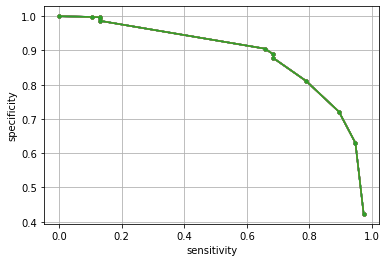

In [91]:
for i in weights_list:
    class_weight = {0: 1, 1: i}
    grl = imodels.GreedyRuleListClassifier(max_depth=12, class_weight=class_weight, criterion='neg_corr')
    grl.fit(X_train_all, y_train_all, feature_names=feature_names_ageinvariant, verbose=False)
    stats, threshes = predict_and_save(grl,'grl_children_all_' + str(i), X_train_all, X_tune_all, y_train_all, y_tune_all,
                                      MODELS_DIR = './models/grl_children_all/')

100%|██████████████████████████████████████████| 12/12 [00:00<00:00, 974.44it/s]


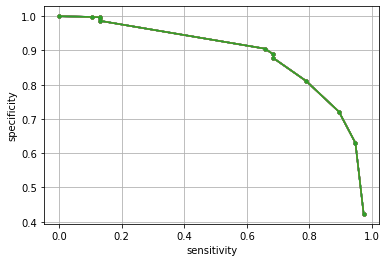

In [92]:
suffixes = ['_train', '_tune']  # _train, _test1, _test2
stats_list = {}
for i, suffix in enumerate(suffixes):
    stats_list[suffix] = print_metrics(suffix, X_train_all, X_tune_all, y_train_all, y_tune_all, MODELS_DIR = './models/grl_children_all/')

In [93]:
stats_list['_train']

,grl_children_all_10,grl_children_all_100,grl_children_all_1000,grl_children_all_150,grl_children_all_200,grl_children_all_300,grl_children_all_400,grl_children_all_50,grl_children_all_500,grl_children_all_600,grl_children_all_700,grl_children_all_800,grl_children_all_900
sens,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95
spec,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63
ppv,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
npv,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
lr+,2.55,2.55,2.55,2.55,2.55,2.55,2.55,2.55,2.55,2.55,2.55,2.55,2.55
lr-,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08
brier_score,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
f1,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03


In [94]:
stats_list['_tune']

,grl_children_all_10,grl_children_all_100,grl_children_all_1000,grl_children_all_150,grl_children_all_200,grl_children_all_300,grl_children_all_400,grl_children_all_50,grl_children_all_500,grl_children_all_600,grl_children_all_700,grl_children_all_800,grl_children_all_900
sens,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95
spec,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63
ppv,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
npv,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
lr+,2.56,2.56,2.56,2.56,2.56,2.56,2.56,2.56,2.56,2.56,2.56,2.56,2.56
lr-,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08
brier_score,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
f1,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03


In [95]:
stats_list['_tune'].iloc[:,(-np.array(stats_list['_tune'][0:1])).argsort().squeeze()[:10]]

,grl_children_all_10,grl_children_all_100,grl_children_all_1000,grl_children_all_150,grl_children_all_200,grl_children_all_300,grl_children_all_400,grl_children_all_50,grl_children_all_500,grl_children_all_600
sens,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95
spec,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63,0.63
ppv,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
npv,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
lr+,2.56,2.56,2.56,2.56,2.56,2.56,2.56,2.56,2.56,2.56
lr-,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08
brier_score,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
f1,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03


In [96]:
class_weight = {0: 1, 1: 100}
grl = imodels.GreedyRuleListClassifier(max_depth=12, class_weight=class_weight, criterion='neg_corr')
grl.fit(X_train_all, y_train_all, feature_names=feature_names_ageinvariant, verbose=False)
print(grl)

/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


mean 0.007 (19947 pts)
if SFxBasHem_1 >= 1.0 then 0.25 (60 pts)
mean 0.006 (19887 pts)
if feat 36 >= 1.0 then 0.034 (1689 pts)
mean 0.003 (18198 pts)
if feat 40 >= 1.0 then 0.217 (23 pts)
mean 0.003 (18175 pts)
if feat 92 >= 1.0 then 0.035 (198 pts)
mean 0.003 (17977 pts)
if feat 78 >= 1.0 then 0.013 (1338 pts)
mean 0.002 (16639 pts)
if feat 16 >= 1.0 then 0.016 (376 pts)
mean 0.002 (16263 pts)
if feat 48 >= 1.0 then 0.042 (24 pts)
mean 0.002 (16239 pts)
if feat 27 >= 1.0 then 0.016 (193 pts)
mean 0.001 (16046 pts)
if feat 3 >= 1.0 then 0.006 (1712 pts)
mean 0.001 (14334 pts)
if feat 13 >= 1.0 then 0.003 (1889 pts)
mean 0.001 (12445 pts)
if feat 66 >= 1.0 then 0.001 (4161 pts)
mean 0.0 (8284 pts)
if feat 81 >= 1.0 then 0.003 (298 pts)



In [97]:
lst = [feature_names_ageinvariant[i] for i in [36,40,92,78,16,48,27,3,13,66,81]]
lst.insert(0, 'SFxBasHem_1')
lst

['SFxBasHem_1',
 'AMSOth_0',
 'SFxPalpDepress_1',
 'NeuroDReflex_0',
 'ClavPar_1',
 'LocLen_3',
 'SFxBasPer_0',
 'AMSSleep_0',
 'Vomit',
 'High_impact_InjSev_3',
 'ClavFace_1',
 'ClavTem_1']

## Children old parent

/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|███████████████████████████████████████████| 4/4 [00:00<00:00, 1050.41it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|███████████████████████████████████████████| 4/4 [00:00<00:00, 1014.46it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: Runtim

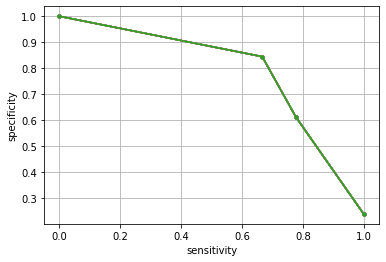

In [98]:
for i in weights_list:
    class_weight = {0: 1, 1: i}
    grl = imodels.GreedyRuleListClassifier(max_depth=12, class_weight=class_weight, criterion='neg_corr')
    grl.fit(X_train_old_parent, y_train_old_parent, feature_names=feature_names_parent, verbose=False)
    stats, threshes = predict_and_save(grl,'grl_children_old_parent_' + str(i), X_train_old_parent, X_tune_old_parent, y_train_old_parent, y_tune_old_parent,
                                      MODELS_DIR = './models/grl_children_old_parent/')

100%|███████████████████████████████████████████| 4/4 [00:00<00:00, 1330.57it/s]


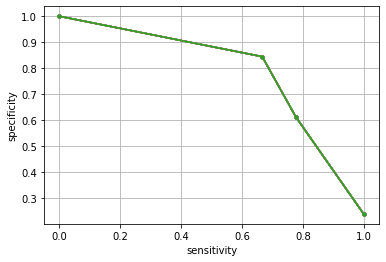

In [99]:
suffixes = ['_train', '_tune']  # _train, _test1, _test2
stats_list = {}
for i, suffix in enumerate(suffixes):
    stats_list[suffix] = print_metrics(suffix, X_train_old_parent, X_tune_old_parent, y_train_old_parent, y_tune_old_parent, MODELS_DIR = './models/grl_children_old_parent/')

In [100]:
stats_list['_train']

,grl_children_old_parent_10,grl_children_old_parent_100,grl_children_old_parent_1000,grl_children_old_parent_150,grl_children_old_parent_200,grl_children_old_parent_300,grl_children_old_parent_400,grl_children_old_parent_50,grl_children_old_parent_500,grl_children_old_parent_600,grl_children_old_parent_700,grl_children_old_parent_800,grl_children_old_parent_900
sens,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95
spec,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61,0.61
ppv,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
npv,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
lr+,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47,2.47
lr-,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08
brier_score,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
f1,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10,0.10


In [101]:
stats_list['_tune']

,grl_children_old_parent_10,grl_children_old_parent_100,grl_children_old_parent_1000,grl_children_old_parent_150,grl_children_old_parent_200,grl_children_old_parent_300,grl_children_old_parent_400,grl_children_old_parent_50,grl_children_old_parent_500,grl_children_old_parent_600,grl_children_old_parent_700,grl_children_old_parent_800,grl_children_old_parent_900
sens,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
spec,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24
ppv,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
npv,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
lr+,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31
lr-,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
brier_score,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
f1,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04


In [102]:
stats_list['_tune'].iloc[:,(-np.array(stats_list['_tune'][0:1])).argsort().squeeze()[:10]]

,grl_children_old_parent_10,grl_children_old_parent_100,grl_children_old_parent_1000,grl_children_old_parent_150,grl_children_old_parent_200,grl_children_old_parent_300,grl_children_old_parent_400,grl_children_old_parent_50,grl_children_old_parent_500,grl_children_old_parent_600
sens,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
spec,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24,0.24
ppv,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
npv,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
lr+,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31,1.31
lr-,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
brier_score,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
f1,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.04


In [103]:
class_weight = {0: 1, 1: 100}
grl = imodels.GreedyRuleListClassifier(max_depth=12, class_weight=class_weight, criterion='neg_corr')
grl.fit(X_train_old_parent, y_train_old_parent, feature_names=feature_names_parent, verbose=False)
print(grl)

mean 0.023 (1830 pts)
if AMS >= 1.0 then 0.093 (289 pts)
mean 0.01 (1541 pts)
if feat 1 >= 1.0 then 0.154 (13 pts)
mean 0.009 (1528 pts)
if feat 0 >= 1.0 then 0.026 (428 pts)
mean 0.002 (1100 pts)
if feat 10 >= 1.0 then 0.003 (635 pts)
mean 0 (465 pts)



/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [105]:
lst = [feature_names_parent[i] for i in [1,0,10]]
lst.insert(0, 'AMS')
lst

['AMS', 'Seiz', 'LOCSeparate', 'Clav']

## Children young parent

###### Cannot fit here.

In [106]:
for i in weights_list:
    class_weight = {0: 1, 1: i}
    grl = imodels.GreedyRuleListClassifier(max_depth=12, class_weight=class_weight, criterion='neg_corr')
    grl.fit(X_train_young_parent, y_train_young_parent, feature_names=feature_names_parent, verbose=False)
    stats, threshes = predict_and_save(grl,'grl_children_young_parent_' + str(i), X_train_young_parent, X_tune_young_parent, y_train_young_parent, y_tune_young_parent,
                                      MODELS_DIR = './models/grl_children_young_parent/')


/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
 67%|████████████████████████████▋              | 2/3 [00:00<00:00, 1131.30it/s]


ValueError: not enough values to unpack (expected 4, got 1)

## Children all parent

/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|███████████████████████████████████████████| 6/6 [00:00<00:00, 1225.75it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|███████████████████████████████████████████| 6/6 [00:00<00:00, 1010.92it/s]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: Runtim

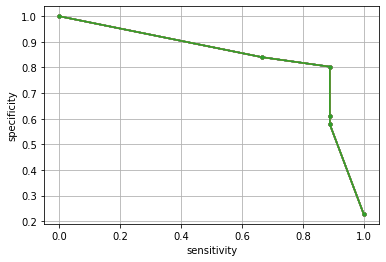

In [107]:
for i in weights_list:
    class_weight = {0: 1, 1: i}
    grl = imodels.GreedyRuleListClassifier(max_depth=12, class_weight=class_weight, criterion='neg_corr')
    grl.fit(X_train_all_parent, y_train_all_parent, feature_names=feature_names_ageinvariant_parent, verbose=False)
    stats, threshes = predict_and_save(grl,'grl_children_all_parent_' + str(i), X_train_all_parent, X_tune_all_parent, y_train_all_parent, y_tune_all_parent,
                                      MODELS_DIR = './models/grl_children_all_parent/')

100%|███████████████████████████████████████████| 6/6 [00:00<00:00, 1167.57it/s]


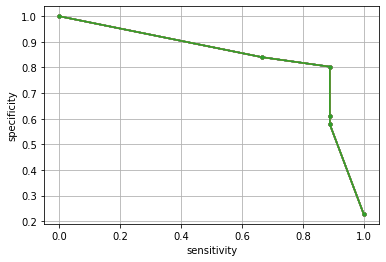

In [108]:
suffixes = ['_train', '_tune']  # _train, _test1, _test2
stats_list = {}
for i, suffix in enumerate(suffixes):
    stats_list[suffix] = print_metrics(suffix, X_train_all_parent, X_tune_all_parent, y_train_all_parent, y_tune_all_parent, MODELS_DIR = './models/grl_children_all_parent/')

In [109]:
stats_list['_train']

,grl_children_all_parent_10,grl_children_all_parent_100,grl_children_all_parent_1000,grl_children_all_parent_150,grl_children_all_parent_200,grl_children_all_parent_300,grl_children_all_parent_400,grl_children_all_parent_50,grl_children_all_parent_500,grl_children_all_parent_600,grl_children_all_parent_700,grl_children_all_parent_800,grl_children_all_parent_900
sens,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96,0.96
spec,0.56,0.56,0.56,0.56,0.56,0.56,0.56,0.56,0.56,0.56,0.56,0.56,0.56
ppv,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
npv,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
lr+,2.18,2.18,2.18,2.18,2.18,2.18,2.18,2.18,2.18,2.18,2.18,2.18,2.18
lr-,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08,0.08
brier_score,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
f1,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09,0.09


In [110]:
stats_list['_tune']

,grl_children_all_parent_10,grl_children_all_parent_100,grl_children_all_parent_1000,grl_children_all_parent_150,grl_children_all_parent_200,grl_children_all_parent_300,grl_children_all_parent_400,grl_children_all_parent_50,grl_children_all_parent_500,grl_children_all_parent_600,grl_children_all_parent_700,grl_children_all_parent_800,grl_children_all_parent_900
sens,0.89,0.89,0.89,0.89,0.89,0.89,0.89,0.89,0.89,0.89,0.89,0.89,0.89
spec,0.80,0.80,0.80,0.80,0.80,0.80,0.80,0.80,0.80,0.80,0.80,0.80,0.80
ppv,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06
npv,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
lr+,4.51,4.51,4.51,4.51,4.51,4.51,4.51,4.51,4.51,4.51,4.51,4.51,4.51
lr-,0.14,0.14,0.14,0.14,0.14,0.14,0.14,0.14,0.14,0.14,0.14,0.14,0.14
brier_score,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
f1,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11


In [111]:
stats_list['_tune'].iloc[:,(-np.array(stats_list['_tune'][0:1])).argsort().squeeze()[:30]]

,grl_children_all_parent_10,grl_children_all_parent_100,grl_children_all_parent_1000,grl_children_all_parent_150,grl_children_all_parent_200,grl_children_all_parent_300,grl_children_all_parent_400,grl_children_all_parent_50,grl_children_all_parent_500,grl_children_all_parent_600,grl_children_all_parent_700,grl_children_all_parent_800,grl_children_all_parent_900
sens,0.89,0.89,0.89,0.89,0.89,0.89,0.89,0.89,0.89,0.89,0.89,0.89,0.89
spec,0.80,0.80,0.80,0.80,0.80,0.80,0.80,0.80,0.80,0.80,0.80,0.80,0.80
ppv,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06
npv,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
lr+,4.51,4.51,4.51,4.51,4.51,4.51,4.51,4.51,4.51,4.51,4.51,4.51,4.51
lr-,0.14,0.14,0.14,0.14,0.14,0.14,0.14,0.14,0.14,0.14,0.14,0.14,0.14
brier_score,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
f1,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11


In [112]:
class_weight = {0: 1, 1: 100}
grl = imodels.GreedyRuleListClassifier(max_depth=12, class_weight=class_weight, criterion='neg_corr')
grl.fit(X_train_all_parent, y_train_all_parent, feature_names=feature_names_ageinvariant_parent, verbose=False)
print(grl)

mean 0.023 (2050 pts)
if AMS >= 1.0 then 0.09 (335 pts)
mean 0.01 (1715 pts)
if feat 3 >= 1.0 then 0.059 (102 pts)
mean 0.007 (1613 pts)
if feat 0 >= 1.0 then 0.019 (419 pts)
mean 0.003 (1194 pts)
if feat 11 >= 1.0 then 0.015 (67 pts)
mean 0.002 (1127 pts)
if feat 8 >= 1.0 then 0.003 (657 pts)
mean 0 (470 pts)



/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/site-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [114]:
lst = [feature_names_ageinvariant[i] for i in [3,0,11,8]]
lst.insert(0, 'AMS')
lst

['AMS', 'Vomit', 'LOCSeparate', 'High_impact_InjSev_1', 'Clav']

# Interpretation 

tuning does not help much.
Weight is not inportant.
maxdepth is not, either. 

## age>=2, include subvaribles

sensitivity,specificity

.95 .76

Importance high to low:
['SFxBasHem_1',
 'AMS',
 'SFxPalpDepress_1',
 'NeuroDSensory_0',
 'LocLen_3',
 'OSICut_1',
 'Vomit',
 'OSIAbdomen_1',
 'LocLen_4',
 'HASeverity_3',
 'ClavTem_1',
 'Amnesia_verb_1']

## age<2, include subvaribles

sensitivity,specificity

.94 .59

Importance high to low:

['SFxPalp',
 'SeizLen_2',
 'SFxPalpDepress_0',
 'ClavTem_1',
 'AMSSleep_0',
 'SFxBasPer_92',
 'LocLen_4',
 'LocLen_1',
 'ClavFro_1',
 'HA_verb_1',
 'Amnesia_verb_0',
 'Vomit']

## age invariant , include subvaribles

sensitivity,specificity

.95 .63

Importance high to low:
['SFxBasHem_1',
 'AMSOth_0',
 'SFxPalpDepress_1',
 'NeuroDReflex_0',
 'ClavPar_1',
 'LocLen_3',
 'SFxBasPer_0',
 'AMSSleep_0',
 'Vomit',
 'High_impact_InjSev_3',
 'ClavFace_1',
 'ClavTem_1']

## age >=2, no subvariables

sensitivity,specificity

1.00 .24 

It seems bad. Do not use this draw conclusion.

Importance high to low:
['AMS', 'Seiz', 'LOCSeparate', 'Clav']

## age <2, no subvariables

Cannot run

## age invariant , no subvaribles

sensitivity,specificity

.89 .80 - use this

Importance high to low:

['AMS', 'Vomit', 'LOCSeparate', 'High_impact_InjSev_1', 'Clav']

## Overall

AMS is always important.

Sfx and NeuroDeficit is important only when we include subvariables. Vomit is important only when we exclude subvariables. LOC is quite important when we exclude subvariables, and is a bit important when we include subvariables.

For no subvariable case, age>=2 returns bad result, but age invariant result seems good.